In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
import cmasher as cmr

In [2]:
df = pd.read_csv('Events.csv')

In [3]:
df

,Team,Player,Event,startX,startY,endX,endY,outcome
0,Home,Doku,Pass,89,19,97,40,un
1,Home,Doku,Pass,94,26,82,68,su
2,Home,Doku,Pass,88,18,75,31,su
3,Home,Doku,Pass,75,19,65,22,su
4,Home,Doku,Pass,59,19,41,20,su
5,Home,Doku,Pass,60,17,55,7,su
6,Home,Doku,Pass,93,7,78,12,su
7,Home,Doku,Pass,73,12,74,4,su
8,Home,Doku,Pass,67,14,79,5,su
9,Home,Doku,Pass,67,6,63,20,su


In [5]:
df['startX'] = df['startX']*1.2
df['startY'] = df['startY']*0.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*0.8

Text(0.5, 1.0, 'Jeremy Doku Heat Map vs Italy - Euro2020')

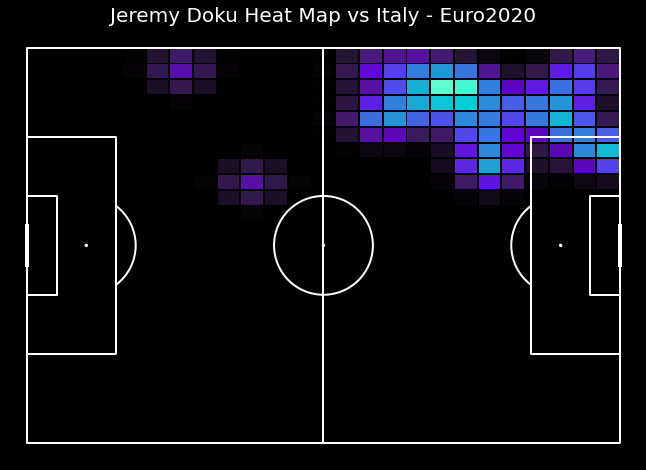

In [8]:
fig,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#000')
ax.patch.set_facecolor('#000')
pitch = Pitch(pitch_color='#000', line_color='#fff',line_zorder=2,
              stripe_color='#c2d59d', stripe=False)  # optional stripes
pitch.draw(ax=ax)

# plot heatmap
bin_statistic = pitch.bin_statistic(df['startX'], df['startY'], statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1) #Gaussian smoothed heatmap
pcm = pitch.heatmap(bin_statistic, ax=ax,cmap=cmr.cosmic, edgecolors='#000')

        
plt.title("Jeremy Doku Heat Map vs Italy - Euro2020", color='white',size=20)
# plt.savefig('dokuheatmap.png', bbox_inches='tight')